In [1]:
import numpy as np 
import pandas as pd 
main_folder = 'data/'
compression = ['12.05/','12.06/','12.10/','12.12/']
item = ['1/','2/','3/','4/','5/']
filename = ['5000.txt','10000.txt','15000.txt','20000.txt']

data_shape = (4,5,4,32768,7)
data = np.zeros(data_shape)

# Here I will read the data from the folder.
# main_folder is the path to the main folder.
# I will store this data in an array.
# It is a 5-dimensional array with the following dimensions:
# The first dimension corresponds to four compression levels: "15%", "20%", "25%", and "30%".
# The second dimension corresponds to five different databases.
# The third dimension corresponds to four rotation rates: "5000", "10000", "15000", and "20000".

for i in range(len(compression)): 
    for j in range(len(item)):
        for k in range(len(filename)):
            file_path = main_folder+compression[i]+item[j]+filename[k]
            data[i,j,k,:,:] = np.loadtxt(fname=file_path,skiprows=16)

print(data.shape)

(4, 5, 4, 32768, 7)


In [2]:
sample_rate = 3333/0.47993081
time_delta = 1/sample_rate
time = time_delta * np.array(range(32768))
SIGNAL_FREQ = np.fft.fftfreq(32768,d=time_delta)
cutoff_freq = 50
filter_mask = np.abs(SIGNAL_FREQ) > cutoff_freq

data_filter_shape = (4,5,4,32768,6)
data_filter = np.zeros(data_filter_shape)

for i in range(4): 
    for j in range(5): 
        for k in range(4): 
            for l in range(6): 
                signal = data[i,j,k,:,l+1]
                SIGNAL = np.fft.fft(signal)
                SIGNAL_FILTER = SIGNAL * filter_mask
                signal_filter = np.fft.ifft(SIGNAL_FILTER)
                signal_filter_real = np.real(signal_filter)
                data_filter[i,j,k,:,l] = signal_filter_real

print(data_filter.shape)

(4, 5, 4, 32768, 6)


In [3]:
from scipy.signal import find_peaks
peakvalue_shape = (4,5,4,6)
peakvalue = np.zeros(peakvalue_shape)
for i in range(4): 
    for j in range(5): 
        for k in range(4): 
            for l in range(6): 
                data_temp = data_filter[i,j,k,:,l]
                data_abs = np.abs(data_temp)
                peaks,_ = find_peaks(data_abs)
                peaks_mean_value = 2 * np.mean(data_abs[peaks])
                print(i+1,j+1,k+1,l+1,peaks_mean_value)
                peakvalue[i,j,k,l] = peaks_mean_value

1 1 1 1 0.0010885895176689464
1 1 1 2 0.0005022566410915551
1 1 1 3 0.0012821032197805038
1 1 1 4 0.009271812742877878
1 1 1 5 0.005496177950325896
1 1 1 6 0.0020088894654671395
1 1 2 1 0.0009865508126254323
1 1 2 2 0.0005812880560104257
1 1 2 3 0.0020401893068219762
1 1 2 4 0.0034512981795636454
1 1 2 5 0.00537372807613234
1 1 2 6 0.0026520946864612674
1 1 3 1 0.0013271837169850562
1 1 3 2 0.0014287182235142879
1 1 3 3 0.0032843834192027624
1 1 3 4 0.004140911911500567
1 1 3 5 0.006885163913346925
1 1 3 6 0.00407646419461384
1 1 4 1 0.01048125253023383
1 1 4 2 0.0015073700727828343
1 1 4 3 0.0022873404786863867
1 1 4 4 0.015528716566651907
1 1 4 5 0.017194024588166195
1 1 4 6 0.0038310314867461464
1 2 1 1 0.0010676644469213652
1 2 1 2 0.0005536008619891028
1 2 1 3 0.0013187128740661182
1 2 1 4 0.01054004741821562
1 2 1 5 0.005155116717108113
1 2 1 6 0.002044915729010364
1 2 2 1 0.0009098090362256033
1 2 2 2 0.0005897895682980405
1 2 2 3 0.002115530446613478
1 2 2 4 0.00329663653882331

In [4]:
import matplotlib.pyplot as plt

vibration_reduction_shape = (4,5,4,3)
vibration_reduction = np.zeros(vibration_reduction_shape)
relative_reduction_shape = (4,5,4,3)
relative_reduction = np.zeros(relative_reduction_shape)

for i in range(4): 
    for j in range(5): 
        for k in range(4): 
            for l in range(3): 
                peak_1 = peakvalue[i,j,k,l]
                peak_2 = peakvalue[i,j,k,l+3]
                vibration_reduction[i,j,k,l] = peak_2 - peak_1
                relative_reduction[i,j,k,l] = (vibration_reduction[i,j,k,l] / peak_2)

print('finished')
                

finished


In [5]:
x_relative_reduction = relative_reduction[:,:,:,0]
y_relative_reduction = relative_reduction[:,:,:,1]
z_relative_reduction = relative_reduction[:,:,:,2]

rela_reduction_shape = (4,4)
rela_reduction_x = np.zeros(rela_reduction_shape)
rela_reduction_y = np.zeros(rela_reduction_shape)
rela_reduction_z = np.zeros(rela_reduction_shape)

for i in range(4): 
    for j in range(4): 
        rela_reduction_x[i][j] = np.mean(x_relative_reduction[i,:,j])
        rela_reduction_y[i][j] = np.mean(y_relative_reduction[i,:,j])
        rela_reduction_z[i][j] = np.mean(z_relative_reduction[i,:,j]) 

rela_reduc_x = np.zeros(16)
rela_reduc_y = np.zeros(16) 
rela_reduc_z = np.zeros(16) 

for i in range(4): 
    rela_reduc_x[4*i:4*i+4] = rela_reduction_x[i,:]
    rela_reduc_y[4*i:4*i+4] = rela_reduction_y[i,:]
    rela_reduc_z[4*i:4*i+4] = rela_reduction_z[i,:]

print('finished')

finished


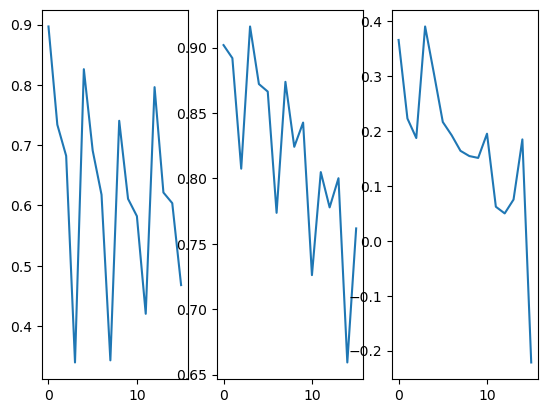

In [6]:
index = np.array(range(16))
plt.figure(1)
plt.subplot(1,3,1)
plt.plot(index,rela_reduc_x)
plt.subplot(1,3,2)
plt.plot(index,rela_reduc_y)
plt.subplot(1,3,3)
plt.plot(index,rela_reduc_z)
plt.show()